In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [3]:
data=pd.read_csv(r'C:\Users\usman\Downloads\Compressed\archive_8\USvideos.csv')

# Data Exploration

In [4]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [6]:
data.shape

(40949, 16)

In [8]:
data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


#### Deleting the unnecessary columns from the dataset

In [10]:
data=data.drop(['video_id','thumbnail_link','video_error_or_removed','trending_date','publish_time','category_id'],axis=1)

In [11]:
data.isnull().sum()

title                  0
channel_title          0
tags                   0
views                  0
likes                  0
dislikes               0
comment_count          0
comments_disabled      0
ratings_disabled       0
description          570
dtype: int64

#### Description column has null values.Putting an empty string in place of each null value in the Description column

In [12]:
data["description"] = data["description"].fillna(value="")

In [15]:
pd.set_option('display.float_format', '{:.2f}'.format)
data.describe()

,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00
mean,2360784.64,74266.70,3711.40,8446.80
std,7394113.76,228885.34,29029.71,37430.49
min,549.00,0.00,0.00,0.00
25%,242329.00,5424.00,202.00,614.00
50%,681861.00,18091.00,631.00,1856.00
75%,1823157.00,55417.00,1938.00,5755.00
max,225211923.00,5613827.00,1674420.00,1361580.00


# OBSERVATIONS

* The average number of views of a trending video is 2,360,784. The median value of the number of views is 681,861, which means that half of the trending videos have less than this number and the other half have views greater than this number.


* The average number of likes for a trending video is 74,266, while the average number of likes is 3,711.


* The average number of comments is 8,446 while the median is 1,856.

#### Now checking how many trending video titles have at least one uppercase word

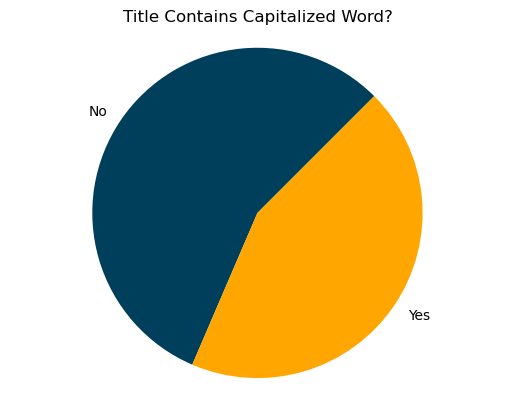

In [17]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


data["contains_capitalized"] = data["title"].apply(contains_capitalized_word)

value_counts = data["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

#### Now Adding a new column to the dataset to analyze the length of titles of videos.
#### Then plotting the title length histogram to get an idea of the length of trending video titles

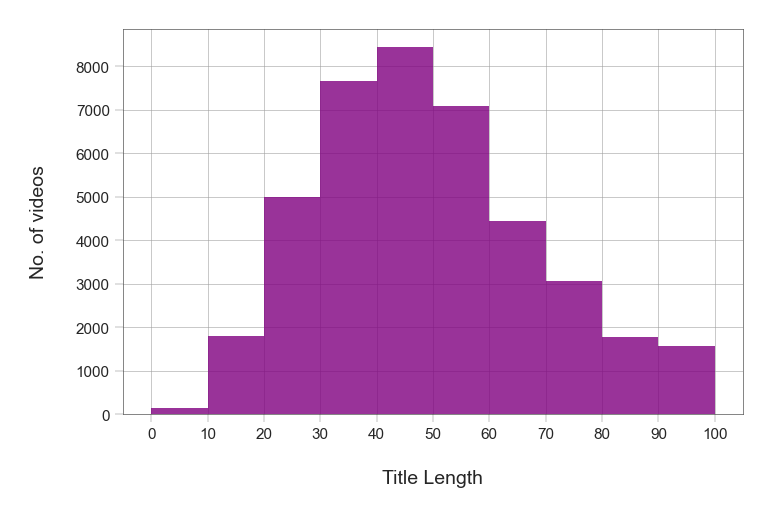

In [26]:
data["title_length"] = data["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
ax.hist(data["title_length"], bins=range(0, 110, 10), color='purple', alpha=0.8)

ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

plt.show()


#### Its looks like a normal distribution

#### Now drawing a scatter plot to analyze the relationship between the title length and the number of views

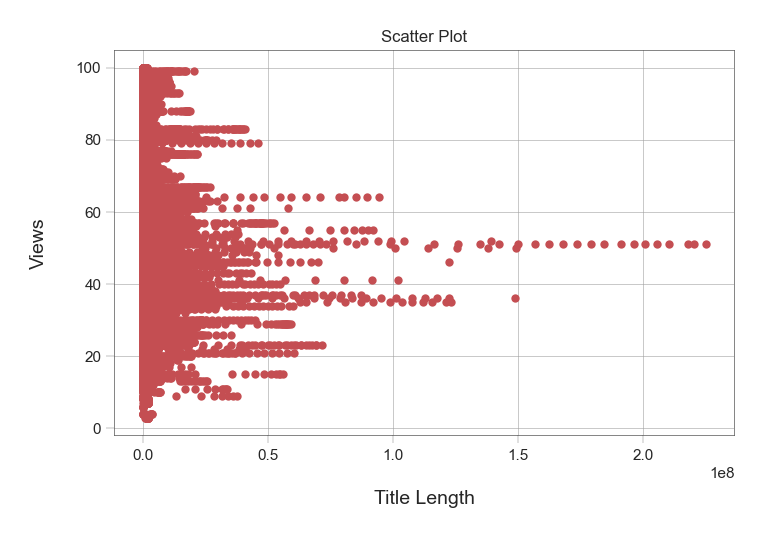

In [25]:
plt.scatter(data['views'], data['title_length'],color='r')
plt.xlabel('Title Length')
plt.ylabel('Views')
plt.title('Scatter Plot')

# Show the plot
plt.show()

#### There is no relationship between the length of the title and the number of views

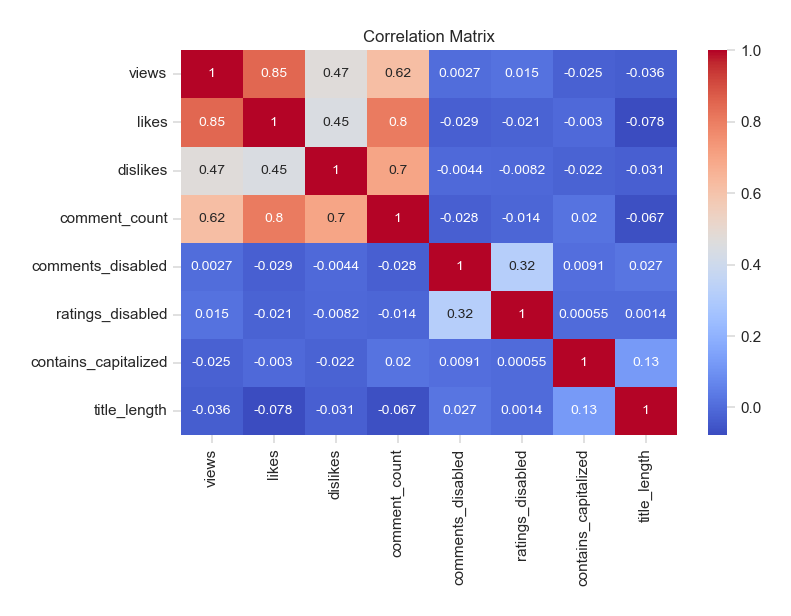

In [28]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### It indicates that views and likes are strongly positively correlated.

# Drawing a wordcloud

#### Now visualizing the most common words in the titles; the more common the word, the larger its font-size

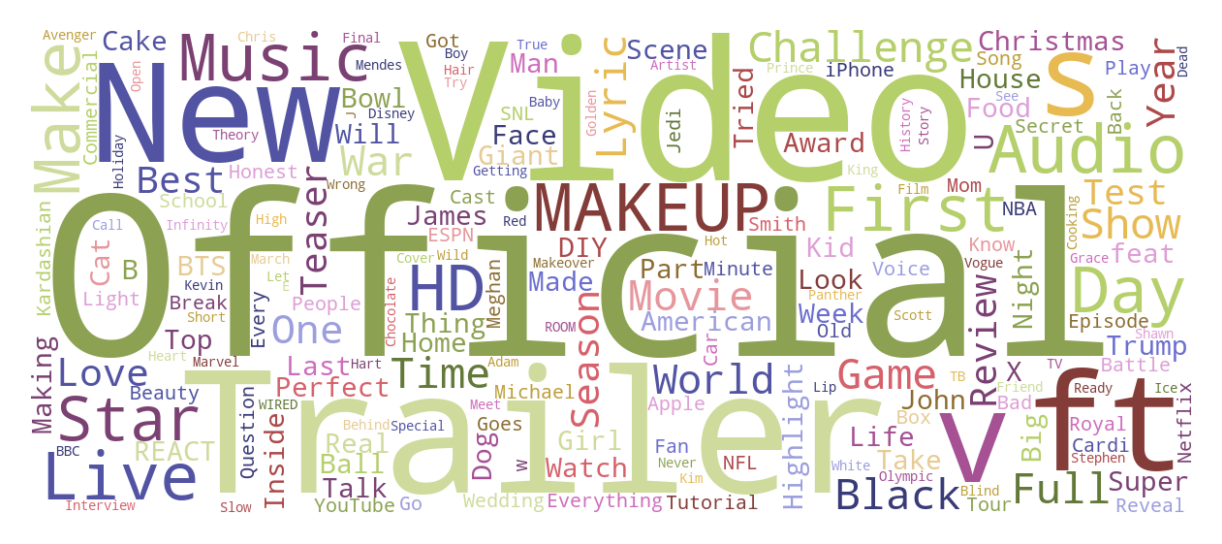

In [30]:
title_words = list(data["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

#### These are the most used words in youtube titles. It is a goldmine for content creators. This is the power of Data Science